# FINAL PROJECT - Machine Learning and Prediction

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

In [5]:
data = pd.read_csv('C:/Users/kandi/OneDrive/Bethel Tech Work/Final Project/FullDataSetTransposed.csv')

In [6]:
data.head()

,"ACTIVE,FULL TIME","ACTIVE,PART TIME","ACTIVE,3/4 TIME","ACTIVE,Temp/Seasonal","LEAVE OF ABSENCE,FULL TIME","LEAVE OF ABSENCE,PART TIME","TERMINATED,FULL TIME","TERMINATED,PART TIME","TERMINATED,Temp/Seasonal",Sales,...,Net Ordinary Income,Prior Period Credit/Expense,Misc Other Income,Total Other Income,Absorbed Expense,Misc Other Expense,Owner Wage Draw,Total Other Expense,Net Other Income,Net Income
0,1281,152,0,42,5,6,1189,136,148,4,...,26492.12,0.00,2572.11,2572.11,0.00,800.00,12106.78,12906.78,-10334.67,16157.45
1,1338,159,0,44,3,0,1224,136,149,4,...,44936.05,0.00,-2129.75,-2129.75,0.00,0.00,25532.16,25532.16,-27661.91,17274.14
2,1357,170,0,44,4,1,1256,141,151,4,...,28386.50,-2800.00,1962.73,-837.27,0.00,1250.00,25006.25,26256.25,-27093.52,1292.98
3,1312,109,0,60,1,1,1355,206,157,3,...,33084.67,66021.45,-863.50,65157.95,5670.47,2506.30,24961.38,33138.15,32019.80,65104.47
4,1390,114,0,82,1,1,1395,210,165,3,...,40862.23,0.00,207.60,207.60,0.00,1110.16,24961.38,26071.54,-25863.94,14998.29


In [15]:
def sum(row):
    return row['ACTIVE,FULL TIME'] + row['ACTIVE,PART TIME'] + row['ACTIVE,3/4 TIME']

data.apply(sum, axis=1)

0     1433.0
1     1497.0
2     1527.0
3     1421.0
4     1504.0
5     1521.0
6     1661.0
7     1671.0
8     1675.0
9     1776.0
10    1753.0
11    1853.0
12    1981.0
dtype: float64

In [16]:
data['TOTAL WSES']= data.apply(sum, axis=1)

In [21]:
data.head()

,"ACTIVE,FULL TIME","ACTIVE,PART TIME","ACTIVE,3/4 TIME","ACTIVE,Temp/Seasonal","LEAVE OF ABSENCE,FULL TIME","LEAVE OF ABSENCE,PART TIME","TERMINATED,FULL TIME","TERMINATED,PART TIME","TERMINATED,Temp/Seasonal",Sales,...,Prior Period Credit/Expense,Misc Other Income,Total Other Income,Absorbed Expense,Misc Other Expense,Owner Wage Draw,Total Other Expense,Net Other Income,Net Income,TOTAL WSES
0,1281,152,0,42,5,6,1189,136,148,4,...,0.00,2572.11,2572.11,0.00,800.00,12106.78,12906.78,-10334.67,16157.45,1433.0
1,1338,159,0,44,3,0,1224,136,149,4,...,0.00,-2129.75,-2129.75,0.00,0.00,25532.16,25532.16,-27661.91,17274.14,1497.0
2,1357,170,0,44,4,1,1256,141,151,4,...,-2800.00,1962.73,-837.27,0.00,1250.00,25006.25,26256.25,-27093.52,1292.98,1527.0
3,1312,109,0,60,1,1,1355,206,157,3,...,66021.45,-863.50,65157.95,5670.47,2506.30,24961.38,33138.15,32019.80,65104.47,1421.0
4,1390,114,0,82,1,1,1395,210,165,3,...,0.00,207.60,207.60,0.00,1110.16,24961.38,26071.54,-25863.94,14998.29,1504.0


In [44]:
x= data[['TOTAL WSES','Payroll']]

In [45]:
y= data['Gross Profit']

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .3)

In [83]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_train.shape)

(9, 2) (9,)
(4, 2) (9,)


In [84]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
predictions = lm.predict(x_test)
predictions

array([153238.52114905, 157960.0154069 , 166222.63035814, 190278.17198858])

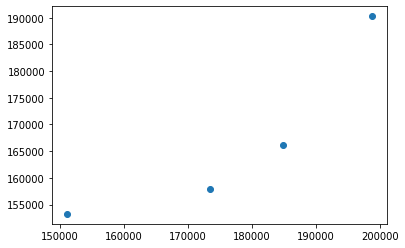

In [86]:
plt.scatter(y_test, predictions)

In [87]:
print("Score:", lm.score(x_test, y_test))

Score: 0.4529733277837937
